<b>ANSWER 1 + ANSWER 2</b>

To find the number of multiplications and additions needed to perform the matrix multiplication between (n,k) and (k,m) matrix. for each element of the resultant matrix we will need k multiplications and k additions and there total (nxn) elements in the resultant matrix hence total number of multiplication and additions needed would be
Multiplications-$(n*m*k)$
Additions -$(n*m*k)$

In [2]:
# %%timeit
#ANSWER 1 and 2
import random
matrix_1=list()
matrix_2=list()
matrix_3=list()
m=20;
n=30;
k=20;
for i1 in range(n):
    temp=list()
    for j1 in range(k):
        temp.append(random.randint(1,10));
    matrix_1.append(temp);
for i1 in range(k):
    temp=list();
    for j1 in range(m):
        temp.append(random.randint(1,10));
    matrix_2.append(temp);
for i1 in range(n):
    temp=list();
    for j1 in range(m):
        temp.append(0);
    matrix_3.append(temp);

# print(matrix_2)
# print(matrix_3)

In [3]:
%%timeit
for i1 in range(m):
    for i in range(n):
        for j in range(k):
            
            matrix_3[i][i1]+=matrix_1[i][j]*matrix_2[j][i1];
# print(matrix_1)

1.55 ms ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
# %%timei
import numpy as np

matrix_3=np.zeros((n,m),dtype=int)
matrix_1=np.random.randint(1,10,(n,k))
matrix_2=np.random.randint(1,10,(k,m))

    

In [5]:
%%timeit
matrix_3=np.dot(matrix_1,matrix_2)

8.65 µs ± 16.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<b> Why Numpy Is Faster</b><br>
The numpy array np.dot is much faster than the standard algorithm using python lists because when using python loops the CPython compiler has to lookup for the type of variable each time during accessing the element and perform the operation according to the typr of the data.
While when using Numpy implementation using the numpy.dot function uses vectorised implementation it uses ndarray which can contain data types of only one type hence the extra time for checking the overhead is not needed.

<b> ANSWER 3 </b>

<b> Time Complexity By The Given Method </b> <br>
Using the method described in the question we would be required to find the ceil((n/2))th minimum element and if n=even then we would require (n/2) and (n/2)+1 th minimum elements. this would require n/2 passes of the array and hence the time complexity would be $(n^2)/2$ which would be $O(n^2)$.
We can use a better method by using the sort function. The most efficient sort functions use time complexity of $nlogn$ and hence finding the middel element from a sorted array would take constant amount of time thus the total time complexity for this type of approach would be $nlogn$.

In [242]:
#ANSWER 3
n=10000;
a=np.random.randint(1,n,n)
# print(a , n)

In [243]:
%%timeit
temp=list()
for i in range(n):
    temp.append(a[i])
# min_ind=0
min_val1=1000000000
min_val2=1000000000
min_ind2=0
for j in range(int(len(temp)/2)):
    min_val1=1000000000
    min_ind=0
    for i in range(len(temp)):
        if(temp[i]<min_val1):
            min_val1=temp[i]
            min_ind=i
    temp[min_ind]=1000000000
for i in range(len(temp)):
    if(temp[i]<min_val2):
        min_val2=temp[i]


4.22 s ± 373 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [245]:
temp=list()
for i in range(n):
    temp.append(a[i])
# min_ind=0
min_val1=1000000000
min_val2=1000000000
min_ind2=0
for j in range(int(len(temp)/2)):
    min_val1=1000000000
    min_ind=0
    for i in range(len(temp)):
        if(temp[i]<min_val1):
            min_val1=temp[i]
            min_ind=i
    temp[min_ind]=1000000000
for i in range(len(temp)):
    if(temp[i]<min_val2):
        min_val2=temp[i]

In [246]:
if(n%2==0):
    print((min_val1+min_val2)/2)
else:
    print(min_val1)


5035.0


In [247]:
%timeit b=np.sort(a)
b=np.sort(a)
# print(len(b))
if(n%2==0):
    print((b[int(n/2)-1]+b[int(n/2)])/2)
else:
    print(b[int((n-1)/2)])


602 µs ± 6.03 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5035.0


In [248]:
%timeit np.median(a)

print(np.median(a))

97.3 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5035.0


<b> Answer 4</b> <br>
The gradient of $(x^2y + y^3sin(x))$ with respect to x is $(2xy+y^3cos(x))$ and with respect to y is $(x^2+3y^2sin(x))$

In [219]:
#ANSWER 5
import jax
import jax.numpy as jnp
from jax import random

In [220]:
def f5(x,y):
    return (x**2)*y + y**3*jnp.sin(x)
def f_dx(x,y):
    return (2*x*y)+(y**3)*jnp.cos(x)
def f_dy(x,y):
    return (x**2)+3*(y**2)*jnp.sin(x)

In [221]:
df5_dx=jax.grad(f5,argnums=0)
df5_dy=jax.grad(f5,argnums=1)

In [222]:
x1=np.random.random(100)
y1=np.random.random(100)

In [223]:
for i in range(100):
    print(df5_dx(x1[i],y1[i])-f_dx(x1[i],y1[i]))

-1.4901161e-08
0.0
-1.1920929e-07
2.9802322e-08
0.0
0.0
0.0
-9.313226e-10
0.0
-1.1920929e-07
3.7252903e-09
0.0
0.0
-1.1920929e-07
0.0
-9.313226e-10
-5.9604645e-08
0.0
0.0
0.0
0.0
0.0
2.9802322e-08
0.0
2.9802322e-08
0.0
0.0
0.0
0.0
0.0
0.0
1.1920929e-07
0.0
0.0
-5.9604645e-08
0.0
1.4901161e-08
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.4901161e-08
4.656613e-10
1.4901161e-08
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-2.9802322e-08
0.0
0.0
-2.9802322e-08
0.0
0.0
-7.450581e-09
0.0
-5.9604645e-08
-2.9802322e-08
-7.450581e-09
0.0
-1.1920929e-07
1.1920929e-07
0.0
0.0
0.0
-2.9802322e-08
1.1920929e-07
0.0
0.0
0.0
0.0
2.9802322e-08
2.9802322e-08
0.0
0.0
0.0
0.0
-1.4901161e-08
0.0
0.0
0.0
0.0
0.0
-1.1641532e-10


<b> ANSWER 6</b> <br>

In [200]:
#ANSWER 6
from sympy import diff,sin,exp
from sympy.abc import x,y
expr=(x**2)*y+(y**3)*(sin(x))

In [194]:
expr2=diff(expr,x)

In [196]:
expr2

2*x*y + y**3*cos(x)

In [197]:
expr3=diff(expr,y)

In [198]:
expr3

x**2 + 3*y**2*sin(x)

<b> ANSWER 7 </b>

In [250]:
#ANSWER 7
def make_dict(l):
    e=dict()
    for i in range(0,len(l),2):
        if(type(l[i+1])==list):
            e[l[i]]=make_dict(l[i+1])
        else:
            e[l[i]]=l[i+1]
    return e
l=[2022,['MSE',['Roll Number',2111000,'Name','Rakesh','Marks',['Maths',100,'English',100,'Sanskrit',95]]]]
# d=dict()
e=make_dict(l)
print(e)

{2022: {'MSE': {'Roll Number': 2111000, 'Name': 'Rakesh', 'Marks': {'Maths': 100, 'English': 100, 'Sanskrit': 95}}}}


<b>ANSWER 8 </b>

In [206]:
#ANSWER 8
class year:
    def __init__(self,branches):
        self.branches=branches;
class branch:
    def __init__(self,students):
        self.students=students
class student:
    def __init__(self,rollnum,name,marks):
        self.rollnum=rollnum
        self.name=name
        self.marks=marks
data=[]
student1=student(1,'ravi',['math',100,'science',50])
student2=student(2,'rahul',['maths',100,'science',55])
branch1=branch([student1,student2])
branch2=branch([student1,student2])
year1=year([branch1,branch2])

<b>ANSWER 9 </b>

Text(0, 0.5, 'x')

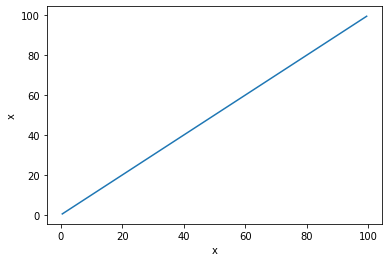

In [2]:
#ANSWER 9
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0.5,100,0.5)
y=x
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("x")

Text(0, 0.5, 'x^2')

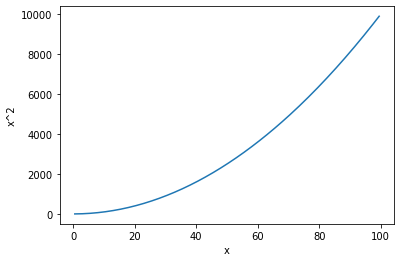

In [254]:
plt.plot(x,x*x)
plt.xlabel("x")
plt.ylabel("x^2")

Text(0, 0.5, 'x^3/100')

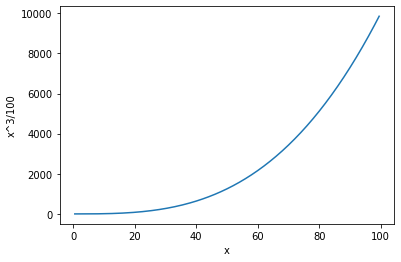

In [255]:
y3=(x**3)/100
plt.plot(x,y3)
plt.xlabel("x")
plt.ylabel("x^3/100")

Text(0, 0.5, 'sinx')

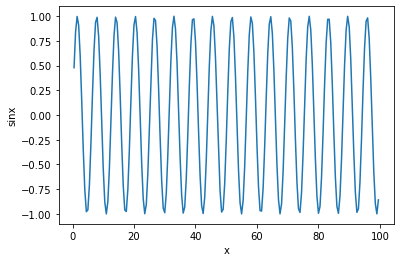

In [256]:
y4=np.sin(x)
plt.plot(x,y4)
plt.xlabel("x")
plt.ylabel("sinx")

Text(0, 0.5, 'sinx/x')

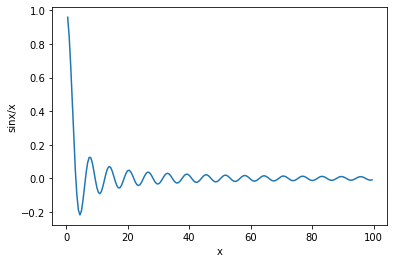

In [3]:
y5=np.sin(x)
plt.plot(x,y5/x)
plt.xlabel("x")
plt.ylabel("sinx/x")

Text(0, 0.5, 'logx')

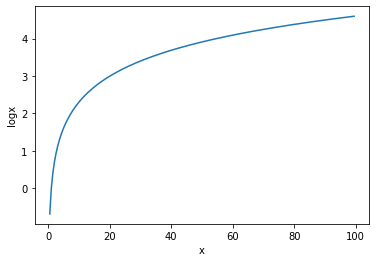

In [258]:
y6=np.log(x)
plt.plot(x,y6)
plt.xlabel("x")
plt.ylabel("logx")

Text(0, 0.5, 'exp(x)')

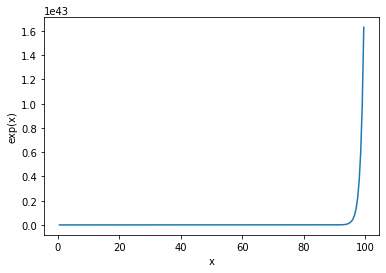

In [259]:
y7=np.exp(x)
plt.plot(x,y7)
plt.xlabel("x")
plt.ylabel("exp(x)")

<b> ANSWER 10 + ANSWER 11 </b>

In [170]:
#ANSWER 10 and 11
import pandas as pd
arr1=np.random.uniform(1,2,(20,5))
df=pd.DataFrame(arr1,columns=['a','b','c','d','e'])
df
print(df.columns[np.argmax(np.std(df,axis=0))])
print(np.argmin(np.mean(df,axis=1)))

e
15


In [171]:
df['f']=df['a']+df['b']+df['c']+df['d']+df['e']
df['g']=df['f'].apply(lambda x:"GT8" if x>8 else "LT8")
df

,a,b,c,d,e,f,g
0,1.465756,1.524710,1.176943,1.663883,1.024795,6.856086,LT8
1,1.052855,1.595654,1.379256,1.538129,1.680528,7.246422,LT8
2,1.544316,1.835606,1.463944,1.794191,1.210091,7.848148,LT8
3,1.863955,1.682821,1.497844,1.125827,1.169179,7.339626,LT8
4,1.838340,1.213689,1.193466,1.123904,1.478744,6.848143,LT8
5,1.326894,1.252794,1.301564,1.429351,1.386991,6.697595,LT8
6,1.821075,1.252700,1.215720,1.413161,1.993022,7.695679,LT8
7,1.853841,1.445158,1.838410,1.640472,1.365265,8.143145,GT8
8,1.301847,1.537541,1.577077,1.688180,1.093863,7.198509,LT8
9,1.985037,1.504646,1.351081,1.861998,1.084775,7.787537,LT8


In [172]:
greater8=df.loc[df['g']=="GT8"]
less8=df.loc[df['g']=="LT8"]
print("number with gt8",len(greater8))
print("std for f with g lt8",greater8['f'].std())
print("std for f with g lt8",less8['f'].std())

number with gt8 3
std for f with g lt8 0.1190688009546245
std for f with g lt8 0.43189885856195054


<b> ANSWER 12 </b>

In [202]:
#ANSWER 12
broad1=np.random.randint(1,10,(1,10))
# broad1.reshape(1,10)
broad2=np.random.randint(1,10,(10,1))
print(broad1,broad2,broad1+broad2)

[[2 7 9 2 2 1 4 5 9 3]] [[2]
 [7]
 [6]
 [9]
 [9]
 [2]
 [4]
 [4]
 [4]
 [7]] [[ 4  9 11  4  4  3  6  7 11  5]
 [ 9 14 16  9  9  8 11 12 16 10]
 [ 8 13 15  8  8  7 10 11 15  9]
 [11 16 18 11 11 10 13 14 18 12]
 [11 16 18 11 11 10 13 14 18 12]
 [ 4  9 11  4  4  3  6  7 11  5]
 [ 6 11 13  6  6  5  8  9 13  7]
 [ 6 11 13  6  6  5  8  9 13  7]
 [ 6 11 13  6  6  5  8  9 13  7]
 [ 9 14 16  9  9  8 11 12 16 10]]


The above code demonstrates broadcasting in numpy arrays the array 1 broad 1 is of dimensions (1,10) while the array broad2 is of dimensions (10,1). When we add both the arrays broadcasting happens, the broad 1 is copied n times to make matrix of size(10,10) and similarly the broad2 copies itself 10 times to form matrix of size (10,10) then both the matrices are added this is broadcasting

<b> ANSWER 13</b>

In [69]:
#ANSWER 13
def argmin(a):
    mini=a[0];
    ind=0;
    for i in range(len(a)):
        if(a[i]<mini):
            mini=a[i]
            ind=i;
    return (ind)
a=np.random.randint(1,100,10)
# print(a)
print(argmin(a))
print(np.argmin(a))

7
7
